In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('data/Mall_Customers.csv')

# Show first rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.0

Visualization

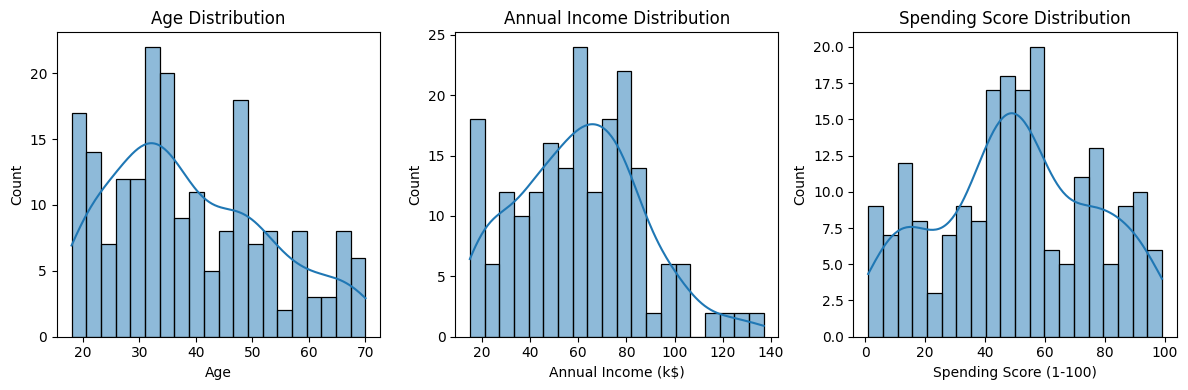

In [ ]:
plt.figure(figsize=(12,4))
# Plotting histograms for each feature
plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

Data preprocessing

In [5]:
# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K- means Clustering

Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3579
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4085
Silhouette Score for k=6: 0.4311
Silhouette Score for k=7: 0.4101
Silhouette Score for k=8: 0.3674
Silhouette Score for k=9: 0.3744
Silhouette Score for k=10: 0.3619


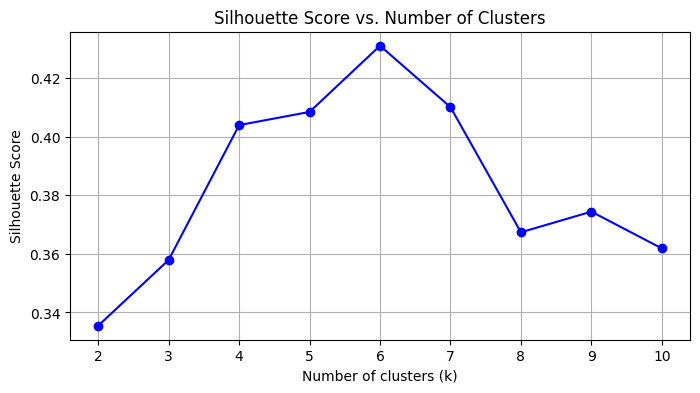

In [6]:
from sklearn.metrics import silhouette_score

# Test k values from 2 to 10
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [7]:
# Choose the best k (highest score)
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on silhouette score: {best_k}")


Optimal number of clusters based on silhouette score: 6


In [8]:
# Fit final KMeans model using best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

Cluster Visualization

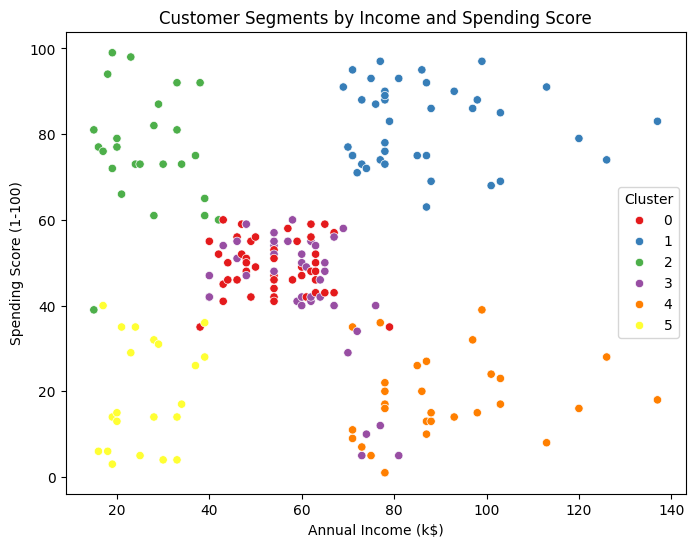

In [ ]:
# Visualize clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette='Set1'
)
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

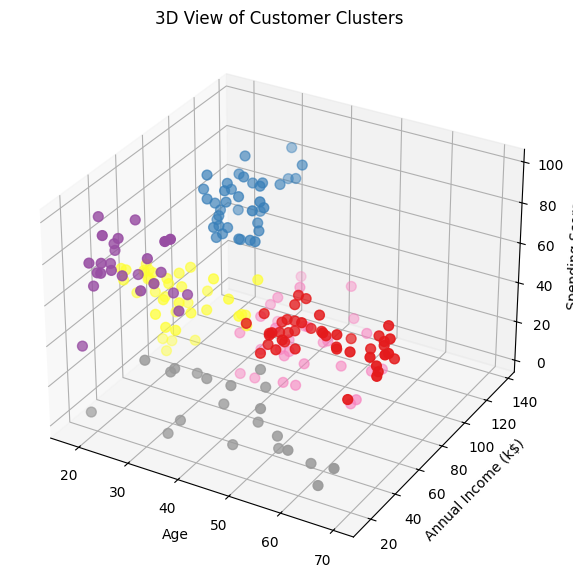

In [ ]:
# 3D visualization of clusters
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Age'], 
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap='Set1', 
    s=50
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title('3D View of Customer Clusters')

plt.show()

In [ ]:
# Cluster statistics
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


C:\Users\user\AppData\Local\Temp\ipykernel_1696\2021925556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set1')


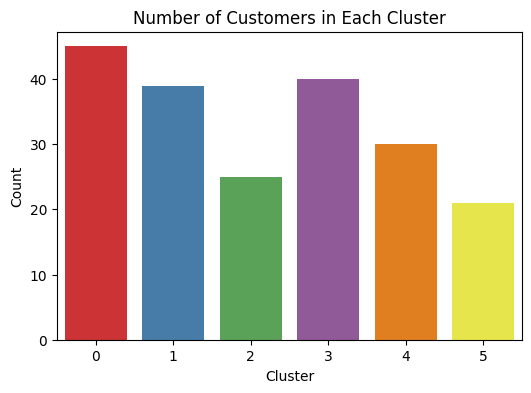

In [ ]:
# Plot number of customers in each cluster
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Cluster Analysis Summary
Based on the clustering analysis using KMeans and Silhouette Score:

Cluster 0: Older, mid-income, moderate spenders — likely value-conscious, could respond to loyalty programs.

Cluster 1: Young, high-income, high spenders — premium segment, ideal for luxury or upselling.

Cluster 2: Very young, low-income, high spenders — trend-sensitive, may overspend on perceived value.

Cluster 3: Young, moderate income, average spenders — balanced group with growth potential.

Cluster 4: Older, high-income, low spenders — potential for re-engagement, possibly brand-disconnected.

Cluster 5: Middle-aged, low-income, low spenders — price-sensitive segment, minimal response expected.

These customer segments can help businesses personalize marketing, optimize pricing, and improve customer retention.